# Better decisions require Better models. 


## Leaders in decision-making

Decision-making is complex. Making decisions under uncertainty or complex scenarios e.g., involving valuations and/or risk management in real time require building reliable models.


## 1st Step: Testing model assumptions

As all models have assumptions, it's important to test model assumptions!
 
In finance, for example, a typical model assumption is: "Volatility of stock prices  = constant."

To find evidence that the volatility of stock prices is far from being constant, we will pick up a stock, say AAPL, and analyze historical stock price information to see how volatility fluctuates over time. 

Using data science tools it's easier to test model assumptions. Results are visualized graphically.


In [1]:
#imports

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings('ignore')

### Getting stocks data from Yahoo

- We are using yfinance to download stock data - the library is useful for Financial Data Analysis


In [2]:
# pip install yfinance

import yfinance as yf

In [4]:
apple = yf.download("AAPL", start="2016-07-20", end="2021-07-20")

[*********************100%***********************]  1 of 1 completed


In [5]:
apple.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-13,144.029999,147.460007,143.630005,145.639999,145.422119,100827100
2021-07-14,148.100006,149.570007,147.679993,149.149994,148.926865,127050800
2021-07-15,149.240005,150.000000,147.089996,148.479996,148.257874,106820300
2021-07-16,148.460007,149.759995,145.880005,146.389999,146.170990,93251400
2021-07-19,143.750000,144.070007,141.669998,142.449997,142.236893,121434600


### Visualizing the stock prices

<AxesSubplot:xlabel='Date'>

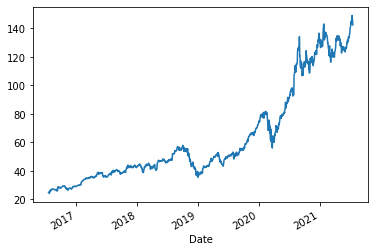

In [6]:
apple['Close'].plot()

## Volatility


Volatility = a statistical measure of the dispersion of returns 
that represents how large stock prices vary around the mean price

Volatility measures the degree of variation of a stock price over time. It is used to characterize risk (uncertainty) of a stock price (risk refers to the probability distribution of returns)


Volatility can be calculated using standard deviation of logarithmic returns, beta coefficients or option pricing models:

### Log-returns 

In [7]:
# Calculating the log-returns
apple['log_returns'] = np.log(apple['Close']/apple['Close'].shift(1))

Text(0, 0.5, 'frequency of log returns')

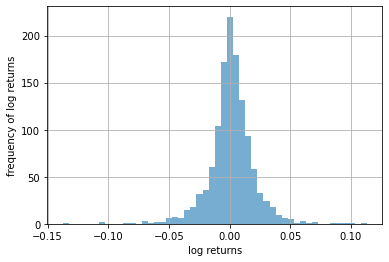

In [8]:
apple['log_returns'].hist(bins=50, alpha=0.6)
plt.xlabel('log returns')
plt.ylabel('frequency of log returns')


###  Lognormal Model for Stock Prices


- Stock prices move in an exponential way over time and seem to follow a lognormal distribution. 

If prices are assumed to be lognormal distributed, then log of prices follow a normal distribution.
 
Lognormal distribution is the one of the assumptions used in the Black Scholes model of option pricing.


- Return (%change in price) is better for modeling stock prices as it gives a better overall of the returns.


Daily (or monthly/quarterly) returns have a lot of noise; returns over a longer period (yearly) is more meaningful when evaluating investments. 

- Log-returns are better than simple returns.

Log returns have the advantage that they can be added across time periods.


- Logarithm is linked to compounding

Stock prices are assumed to be continuously compounded since they respond almost instantly to changes in the demand & supply. 

Price of the stock being continuously compounded can be added across time. 

This approximation (and BS model assumption) is a desirable mathematical property 
and not necessarily the reality. 

- The limits to compounding

Money do not move continuously. There is a ceiling to the compounding phenomenon, even when compounding occurs at an infinite amount/times.

More on "magic of compounding" 
@ https://youtu.be/6CQZsEDt6Zw



### Yearly Volatility

There are 252 trading days in a year


Yearly volatility is calculated using moving standard deviation * sqrt(252):

In [9]:
apple['volatility'] = apple['log_returns'].rolling(252).std() * np.sqrt(252)

<AxesSubplot:xlabel='Date'>

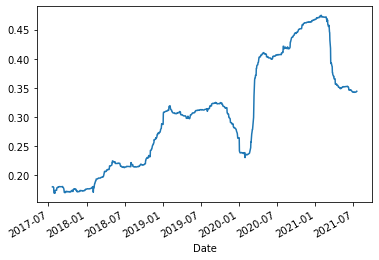

In [10]:
apple['volatility'].plot()